In [ ]:
import pandas as pd
import numpy as np
import sklearn as sk

from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import train_test_split

from sklearn.tree import  DecisionTreeClassifier
from sklearn.metrics import  accuracy_score

from sklearn.ensemble import RandomForestClassifier

## Random Forests

In previous lessons we've covered the basics of decision trees and bootstrap aggregating, but in this lesson, we'll turn our spotlight solely on Random Forests.

### *Why Random Forests?*

  A random forest uses the age old saying "two (or more) heads are better" than one and applies it to decsion trees. We saw that a decision tree splits the dataset on various features and that it's essential to place priority on feature splits that best seperate the dataset.

Even though they are widely applicable and easy to visualize, *decision trees have their downsides*:
- At *high depths*, they can create unnecessarily complex trees that *overfit* the data.
- Can be very unpredictable when slightly changing up the dataset.
- Since decision trees rely on *heuristics* (basically a user defined metric to say how well the tree is splitting up the dataset) those heuristics can't be guaranteed to always find the optimum tree.

These above problems that a single decision tree faces can be mitigated by a little help from its friends... more decision trees!

Essentially a random forest divys up the tasks of finding the best features to split on among different decision trees and let's them run their course on these features. After some defined time to stop, the trees congregate together in an *ensemble* to compare their findings and find an average feature split that works best off of what they've found.




## *Let's Explore This Forest! But, First, A Little Recap*

I know, I want to get right to creating Random Forests too, but we need to take a step back and make sure we understand how decision trees work.

Fill in the equations for Gini Impurity and Entropy and run the following cell to see them graphed for the range of proabilites $ 0 \leq p_i \leq 1 $.


In [ ]:
## Fill in method below
def gini_impurity(probability):
  return 

In [ ]:
import math 
## Fill in method below
def entropy(probability):
  return

Text(0, 0.5, 'Function Values')

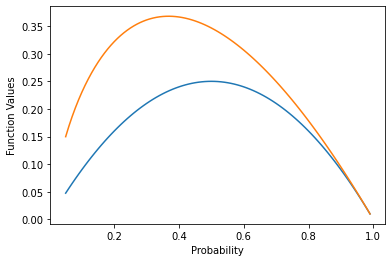

In [ ]:
from matplotlib import pyplot as plt

vals = np.arange(.05, 1, .01)
gini_impurity_vals = [gini_impurity(prob) for prob in vals] #To fill in
entropy_vals = [entropy(prob) for prob in vals] #To fill in 
plt.plot(vals, gini_impurity_vals, label="Gini Impurity")
plt.plot(vals, entropy_vals, label="Entropy")
plt.xlabel("Probability")
plt.ylabel("Function Values")


## Importing and Preparing Our Dataset
Now let's get working towards predicting these MPGs for Jones from the notes. We'll be working with a dataset originally from the Statlib library at Carnegie Mellon.

### Dataset Properties
1.  1 **mpg** column for the car's fuel efficiency in miles per gallon.
2. 8 columns of other car attributes: 5 continuous and 3 categorical.
3. 398 rows/instances of cars.





Let's first import this dataset and take a quick peak at the columns and their value
 see how we can divide our MPG values into classes to get the ball (or tire) rolling!

In [ ]:
#import the auto-mpg csv in using pandas
cars = pd.read_csv("auto-mpg.csv")
cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Largest (Most Efficient) MPG:  46.6
Smallest (Least Efficient) MPG:  9.0


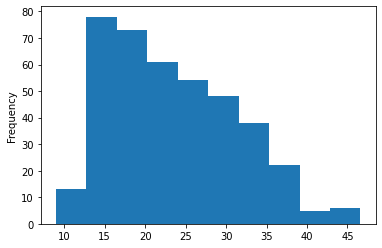

In [ ]:
## -- TO DO -- ##
## Plot the mpg values using pandas as a histogram and fill in the max and min mpgs ##

mpg_max = 
mpg_min = 
## -- END -- ##
print("Largest (Most Efficient) MPG: ", mpg_max)
print("Smallest (Least Efficient) MPG: ", mpg_min)

1. What did you find as the largest and smallest miles per gallons?

As we can see, there's quite a range in MPG that a car could have. They are also skewed to one side.

To make our process easier, lets divide our data up into four named categories, depending on the range of MPGs it falls under and how much we'd want to buy it.
- **0:**  (5.0 < MPG <= 14.9)
- **1:**  (15.0 < MPG <= 24.9)
- **2:**  (25.0 < MPG <= 34.9)
- **3:**  ( 35.0 < MPG <= 50.0)


Let's now create a **desire_creator** function, which outputs an array created from the MPG column of the **cars** dataset, where if the MPG falls into a certain value range as specified above, we insert the corresponding value.

For example, if the mpgs column were an array:
```
mpgs = [34.5, 42.3, 22.9]
desires = desire_creator(mpgs)
print(desires)
[2, 3, 1]
```

In [1]:
# Should return an array containing the desirability ranking deduced from the mpg 
# cars_dataset: 
def desire_creator(cars_dataset):
  desires = []
  ## -- TO DO -- ##
  
    ## -- END -- ##
  return np.asarray(desires)

In [ ]:
desirability = desire_creator(cars)

Let's create a new dataset named **cars_and_desires** replacing the **mpg** column with **desirability**.

Also, since sklearn's random tree classifier only works numeric data, we'll have to drop the **car name** and **horspepower** columns, given they are *string* and *object* types respectively.

In [ ]:
## -- TO DO: -- ##
cars_and_desires = 
## -- END -- ##

In [ ]:
cars_and_desires

,cylinders,displacement,weight,acceleration,model year,origin,desirability
0,8,307.0,3504,12.0,70,1,1
1,8,350.0,3693,11.5,70,1,1
2,8,318.0,3436,11.0,70,1,1
3,8,304.0,3433,12.0,70,1,1
4,8,302.0,3449,10.5,70,1,1
...,...,...,...,...,...,...,...
393,4,140.0,2790,15.6,82,1,2
394,4,97.0,2130,24.6,82,2,3
395,4,135.0,2295,11.6,82,1,2
396,4,120.0,2625,18.6,82,1,2


Let's see this histogram of the desirabilities to get an idea of what proportion of cars are desirable

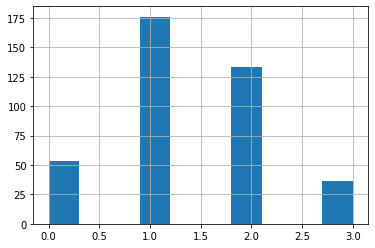

In [ ]:
cars_and_desires.desirability.hist()

Now that we have our data/attributes and labels together... the only logical thing to do now is split them apart.

Let's make our data X and our features y to then train our random forest. 



In [ ]:
# Splits the dataset into an X of the data/attributes, and y of the features on a given index.
# dataset: incoming dataset to be split
# index: the index of final column that is be split off to create the features
def data_label_splitter(dataset, index):
  ## -- TO DO -- ##

  ## -- END -- ##
  return X, y

Let's now fill in this function to divide our X and y into test trains splits.

##### *Hint:* Look at the imports at the top of the page.
##### *Make sure to set `random_state = 42` otherwise, we may run into problems down the line.*

In [ ]:
# Splits the dataset into testing and training data:
# X: The data matrix
# y: The labels column
# test_fraction: What fraction (float) of the data will go to the test set
def train_test_splitter(X, y, test_fraction):
  ##-- TO DO --##
  return 
  ## -- END -- ##


I know filling out these functions is annoying -- they'll come in handy later, I swear. Fill in the method parameters below. Let's first have our testing data to be $\frac{2}{10}$ of the overall dataset.

In [ ]:


test_fraction =  
X, y = data_label_splitter() ## Fill in method parameter
X_train, X_test, y_train, y_test = train_test_splitter() ## Fill in method parameters

We've got our car data all prepared for Jones.

We'll use Scikit-Learn (`sklearn`) to first create a Decision Tree Classifier and run some tests to see how accurately Jones' could perform doing the searching himself, without an ensemble of henchmen to aggregate their findings.

Then, we'll then use Scikit-Learn's Random Forest Classifier to simulate if Jones did employ his henchmen. After we do this, we'll compare the results of the Decision Tree and Random Forest to report back to Jones if employing his henchman is a good idea or not.

Ok, so now we finally have our test and training data set up. 
All we have to do is create a Decision Tree Classifier, fit our X and y training data to the classifier, and see how the prediction on training data performs.

##### *Make sure to set `random_state = 42` otherwise, we may run into problems down the line.*

In [ ]:
## -- TO DO -- ##
tree_classifier =  
tree_y_pred = 
accuracy = 
## -- END -- ##
print(accuracy)

assert(.73 <= accuracy and accuracy <= .74)

0.7375


Try running the above cell a few times without a `random_state` set and see if the accuracy changes. *Did you fix `random_state` to a certain value?* Make sure you understand what assigning `random_state` does within Scikit functions.


Let's now create our Random Forest Classifier, with `20` trees (aka Jones' henchmen).

In [ ]:
## -- TO DO -- ##
forest_classifier = 
forest_y_pred = 
accuracy = 
## -- END -- ##
print(accuracy)

assert(.72 <= accuracy and accuracy <= .79)

0.775


2. *Does the forest perform better than a tree? Is it worth it for Jones to employ `20` henchmen?*

*(Yes, the random forest performs better -- 77.5% > 73.8%, Is is worth it for Jones to employ his henchmen)*

*How about `50`, `100`, and `500`?* Run the cell above on each a few times with each count. Note how the variance in accuracies change.

Below fill in the function which returns the accuracy of a single run of the random forest classifier.

`splits` should be a list of three variables, with each index consisting of:
- **index 0:** training data
- **index 1:** training labels
- **index 2:** test data
- **index 3:** test labels

In the second block of code, experiment with differing `number_of_trees` and `num_rand_seeds` values. 
3. Do you notice any trends related to the number of trees and the metrics of accuracies?

In [ ]:
num_rand_seeds = 10
random_seeds = np.random.randint(100, size=num_rand_seeds)
## -- TO DO -- ##
splits = [] # To Fill In
def random_forest_test(num_trees, splits, rand_seed):


  return accuracy

## -- END -- ##
## The code below prints the average accuracy from 5 runs of random_forest_test(), with each of the random seeds set above ##

number_of_trees =  ## Experiment with this value.
assert(1 <= number_of_trees and number_of_trees <= 500)
accuracies = []
for seed in random_seeds:
  accs = []
  for i in np.arange(5):
    accs.append(random_forest_test(number_of_trees, splits, seed))
  accuracies.append(np.mean(accs))


print(accuracies)
print("Min. Acc. :", min(accuracies))
print("Max. Acc. :", max(accuracies))
print("Avg. Acc. :", np.mean(accuracies))


NameError: ignored

Increasing the number of trees will come closer to reaching a uniform solution regardless of randomness. Even if Jones selects different henchmen who are bound to go about choosing the desired features in different ways, having a large enough of number of trees/henchmen in the ensemble will reach a standardized solution *given the same training and test data.*

Jones wants to know the ideal number of henchman to employ so he doesn't have any of them wasting their time. Let's plot how the # of trees/henchmen affect the accuracy.

4. *Do you think there will be a dropoff, why or why not?*

In [ ]:
tree_counts = np.arange(1, 500, 20)
tree_labels = tree_counts.astype(str)
accs_on_tree_counts = []
for count in tree_counts:
  rand_seeds = np.random.randint(100, size=1)
  accs = []
  for seed in rand_seeds:
    accs.append(random_forest_test(count, splits, seed))
  accs_on_tree_counts.append(np.mean(accs))

NameError: ignored

Text(0, 0.5, 'Accuracy Percentage')

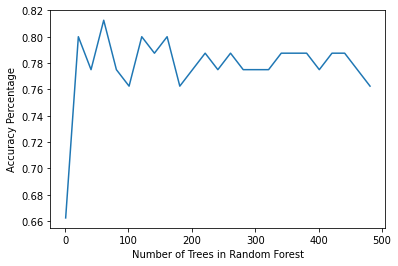

In [ ]:

plt.plot(tree_counts, accs_on_tree_counts, label="Accuracy")
plt.xlabel("Number of Trees in Random Forest")
plt.ylabel("Accuracy Percentage")

5. *Around what accuracy does the classifer reach before jumping around randomly?*

6. *Intuitively, why does the accuracy rating appear to jump around between a few set values? What is going on here?* **Hint:** *Is this a large dataset? / Think about swing states/counties in elections.*


Now Jones is curious to know exactly how these decision trees work. He wants us now to visualize a few decisio trees to see how the features are being split. For this we'll import `graphviz` and the offshoot `dtreeviz`

More info on `dtreeviz` can be found on its github page: https://github.com/parrt/dtreeviz

In [ ]:
# Importing graphviz and installing dtreeviz
import graphviz
!pip install dtreeviz

     |████████████████████████████████| 51kB 3.8MB/s 
     |████████████████████████████████| 204.2MB 65kB/s 
     |████████████████████████████████| 204kB 40.0MB/s 
  Created wheel for dtreeviz: filename=dtreeviz-1.1.3-cp36-none-any.whl size=52494 sha256=399cf190f7788c1068f91b1848673f5831a08413ae7f94e43d6d5eb427c1d8bf
  Stored in directory: /root/.cache/pip/wheels/80/a9/1e/4751fda06e88399ee09410646e9d55c88787276f9537b8ebd0
  Created wheel for pyspark: filename=pyspark-3.0.1-py2.py3-none-any.whl size=204612243 sha256=82b05594ba3529a37183e8cd9f327085d15010c8944601c75fcc33b5b1f06e5f
  Stored in directory: /root/.cache/pip/wheels/5e/bd/07/031766ca628adec8435bb40f0bd83bb676ce65ff4007f8e73f
Successfully built dtreeviz pyspark


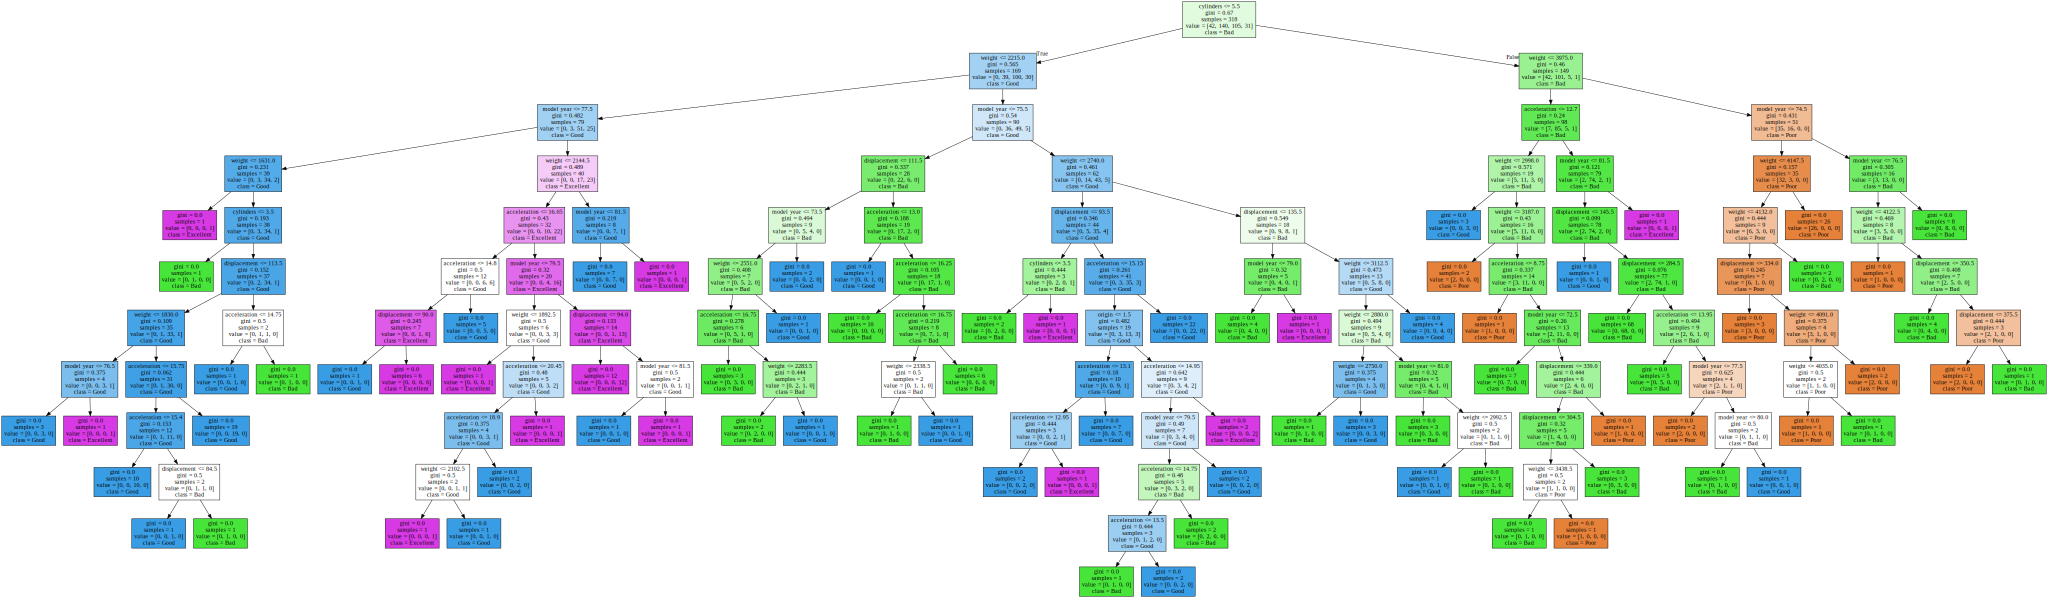

In [ ]:
target_names = ["Poor", "Bad", "Good","Excellent"] # Assign four labels for the four groups
dot_data = tree.export_graphviz(tree_classifier, out_file=None, feature_names=X_train.columns, class_names=target_names, filled=True) ## To Fill In
graph = graphviz.Source(dot_data, format="png")
graph


Browse around the tree. Do you see clusters of Nodes with various ratings? Look a little upstream and report some desicions/splits that help find the most desirable cars, and some that find the least desirable cars. 

6. *How do you interpret the features and numbers contained in these splits? Do the most substantial splits performed at a low depth practically make sense to you in choosing a car which has a high MPG?*

7. *Do you notice any positive or negative outliers among groups of nodes at a high depth in the decision tree?* *What are some splits that precede these outliers?*


8. *What is value of Gini Impurity when leaf nodes are created? Why is that so? What is occuring when the Gini Impurity is 0.5?*

9. Write down the three most crucial splits (in order) you would report back to Jones, to most easily find the best rated cars.

In [ ]:
viz = dreeeviz(tree_classifier, X, y, target_names_"Desirability", feature_names=X_train.colummns, class_names=target_names)